Customer Journey

In [1]:
import joblib
import json
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt


تحميل ملف البيانات data_all  من نوع  Excel في Jupyter Notebook 
download Excel 

In [2]:
from pathlib import Path
import pandas as pd

# تحديد مسار ملف البيانات
excel_path = Path("data_all.xlsx")

print("Current working directory:", Path.cwd())
print("File exists:", excel_path.exists())

if excel_path.exists():
    try:
        # معاينة الأوراق داخل ملف Excel
        xl = pd.ExcelFile(excel_path)
        print("Available sheets:", xl.sheet_names)

        # قراءة الورقة الأولى مع تحويل عمود التاريخ
        df = pd.read_excel(
            excel_path,
            sheet_name=xl.sheet_names[0],
            parse_dates=["activity_date"],  
        )

        # عرض لمحة عن البيانات
        display(df.head())
        df.info()

    except Exception as e:
        print(f"تعذّر قراءة الملف: {e}")

else:
    print("لم يتم العثور على الملف. يرجى وضعه في المسار الصحيح أو تحديث المسار.")

Current working directory: C:\Users\acc
File exists: True
Available sheets: ['data', 'Data_dictionary']


account_id SourceSystem activity_date              who_id  \
0  0010L00001hVmFhQAK      SFDC_US    2022-07-25  0030L00001vlbHLQAY   
1  0010L00001hVmFhQAK      SFDC_US    2023-02-08  0034X00002xZlQtQAK   
2  0010L00001hVmFhQAK      SFDC_US    2023-02-14  0030L00001vlbHLQAY   
3  0010L00001hVmFhQAK      SFDC_US    2023-02-20  0030L00001vlbHLQAY   
4  0010L00001hVmFhQAK      SFDC_US    2023-03-16  0034X00003GOUrFQAX   

  opportunity_id opportunity_stage  is_lead         types Country solution  
0            NaN            no_opp      1.0     Follow Up      US      MRS  
1            NaN            no_opp      1.0  Inbound Call      US      MRS  
2            NaN            no_opp      1.0  Inbound Call      US      MRS  
3            NaN            no_opp      2.0  Inbound Call      US      MRS  
4            NaN            no_opp      1.0  Inbound Call      US      MRS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259917 entries, 0 to 259916
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   account_id         259917 non-null  object        
 1   SourceSystem       259917 non-null  object        
 2   activity_date      205516 non-null  datetime64[ns]
 3   who_id             238294 non-null  object        
 4   opportunity_id     45849 non-null   object        
 5   opportunity_stage  259901 non-null  object        
 6   is_lead            259901 non-null  float64       
 7   types              259901 non-null  object        
 8   Country            259730 non-null  object        
 9   solution           259901 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 19.8+ MB


- حفظ البيانات كملف CSV:
التحقق من وجود الملف بعد الحفظ

In [3]:
from pathlib import Path

out_path = Path("data_all.csv")

# اختيار تمثيل للقيم المفقودة وتحديد الترميز
df.to_csv(out_path, index=False, sep=",", encoding="utf-8", na_rep="")

# التحقق من وجود الملف وحجمه وعرض معاينة سريعة
if out_path.exists():
    print(f"✅ تم حفظ الملف بنجاح: {out_path.resolve()}")
    print(f"🔎 الحجم: {out_path.stat().st_size/1024:.2f} KB")
    # معاينة أول 3 أسطر من الملف النصي
    print(out_path.read_text(encoding="utf-8").splitlines()[:3])
else:
    print("❌ لم يتم العثور على الملف")


✅ تم حفظ الملف بنجاح: C:\Users\acc\data_all.csv
🔎 الحجم: 22836.44 KB
['account_id,SourceSystem,activity_date,who_id,opportunity_id,opportunity_stage,is_lead,types,Country,solution', '0010L00001hVmFhQAK,SFDC_US,2022-07-25,0030L00001vlbHLQAY,,no_opp,1.0,Follow Up,US,MRS', '0010L00001hVmFhQAK,SFDC_US,2023-02-08,0034X00002xZlQtQAK,,no_opp,1.0,Inbound Call,US,MRS']


فحص أولي للبيانات

1-	عرض معلومات عن البيانات 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259917 entries, 0 to 259916
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   account_id         259917 non-null  object        
 1   SourceSystem       259917 non-null  object        
 2   activity_date      205516 non-null  datetime64[ns]
 3   who_id             238294 non-null  object        
 4   opportunity_id     45849 non-null   object        
 5   opportunity_stage  259901 non-null  object        
 6   is_lead            259901 non-null  float64       
 7   types              259901 non-null  object        
 8   Country            259730 non-null  object        
 9   solution           259901 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 19.8+ MB


2-	عرض df.describe()

In [5]:
df.describe(include='all')

account_id SourceSystem                  activity_date  \
count               259917       259917                         205516   
unique               13293            6                            NaN   
top     0012A00002SwdGoQAJ      SFDC_US                            NaN   
freq                  2503       128171                            NaN   
mean                   NaN          NaN  2022-08-29 04:38:32.561552384   
min                    NaN          NaN            1999-12-31 00:00:00   
25%                    NaN          NaN            2021-07-27 00:00:00   
50%                    NaN          NaN            2023-01-10 00:00:00   
75%                    NaN          NaN            2024-06-20 00:00:00   
max                    NaN          NaN            2026-12-31 00:00:00   
std                    NaN          NaN                            NaN   

                    who_id      opportunity_id opportunity_stage  \
count               238294               45849            259901   
unique               56849                8003                24   
top     0030y00002JqdZyAAJ  0064X00001vC3zvQAC            no_opp   
freq                   538                 298            214052   
mean                   NaN                 NaN               NaN   
min                    NaN                 NaN               NaN   
25%                    NaN                 NaN               NaN   
50%                    NaN                 NaN               NaN   
75%                    NaN                 NaN               NaN   
max                    NaN                 NaN               NaN   
std                    NaN                 NaN               NaN   

              is_lead   types Country solution  
count   259901.000000  259901  259730   259901  
unique            NaN      12      54        3  
top               NaN   Email      US      MRS  
freq              NaN  105798  159831   185120  
mean         1.301165     NaN     NaN      NaN  
min          1.000000     NaN     NaN      NaN  
25%          1.000000     NaN     NaN      NaN  
50%          1.000000     NaN     NaN      NaN  
75%          2.000000     NaN     NaN      NaN  
max          2.000000     NaN     NaN      NaN  
std          0.458765     NaN     NaN      NaN

1- تنظيف البيانات الأساسية (مرحلة مبكرة) 

1-1) حفظ نسخة أصلية من البيانات:
الاحتفاظ بنسخة من البيانات قبل أي تعديل للرجوع لها لاحقاً

In [6]:
import os

# حفظ نسخة أصلية
df_original = df.copy(deep=True)
print(f"تم حفظ النسخة الأصلية بنجاح: df_original.shape = {df_original.shape}")

print("المسار الحالي:", os.getcwd())

# معاينة سريعة للنسخة الأصلية
print("معاينة سريعة للنسخة الأصلية (head):")
print(df_original.head(5))

# حفظ نسخة خارجية
df_original.to_csv("data_original.csv", index=False)
print("تم حفظ نسخة خارجية باسم data_original.csv")

# إنشاء نسخة قابلة للتعديل
df_clean = df.copy(deep=True)
print(f"تم إنشاء df_clean للمعالجة: df_clean.shape = {df_clean.shape}")

# معاينة سريعة لنسخة المعالجة
print("معاينة سريعة لـ df_clean (head):")
print(df_clean.head(5))

# التحقق من التطابق
are_equal = df_original.equals(df_clean)
print(f"هل df_original و df_clean متطابقتان تماماً؟ {'نعم' if are_equal else 'لا'}")

تم حفظ النسخة الأصلية بنجاح: df_original.shape = (259917, 10)
المسار الحالي: C:\Users\acc
معاينة سريعة للنسخة الأصلية (head):
           account_id SourceSystem activity_date              who_id  \
0  0010L00001hVmFhQAK      SFDC_US    2022-07-25  0030L00001vlbHLQAY   
1  0010L00001hVmFhQAK      SFDC_US    2023-02-08  0034X00002xZlQtQAK   
2  0010L00001hVmFhQAK      SFDC_US    2023-02-14  0030L00001vlbHLQAY   
3  0010L00001hVmFhQAK      SFDC_US    2023-02-20  0030L00001vlbHLQAY   
4  0010L00001hVmFhQAK      SFDC_US    2023-03-16  0034X00003GOUrFQAX   

  opportunity_id opportunity_stage  is_lead         types Country solution  
0            NaN            no_opp      1.0     Follow Up      US      MRS  
1            NaN            no_opp      1.0  Inbound Call      US      MRS  
2            NaN            no_opp      1.0  Inbound Call      US      MRS  
3            NaN            no_opp      2.0  Inbound Call      US      MRS  
4            NaN            no_opp      1.0  Inbound Cal

 1-2-تنظيف أسماء الأعمدة

In [7]:
import pandas as pd
import janitor  # مكتبة pyjanitor

# تنظيف أسماء الأعمدة دفعة واحدة
df_clean = df_clean.clean_names()

# معاينة أول 10 أسماء أعمدة بعد التنظيف
print("أسماء الأعمدة بعد التنظيف (معاينة):")
print(df_clean.columns[:10])

# حفظ نسخة من أسماء الأعمدة الأصلية والنهائية
import json
with open("column_names_reference.json", "w", encoding="utf-8") as f:
    json.dump(
        {
            "original_columns": df.columns.tolist(),
            "final_columns": df_clean.columns.tolist()
        },
        f,
        ensure_ascii=False,
        indent=2
    )

print("✅ تم تنظيف أسماء الأعمدة وحفظ المرجع في column_names_reference.json")

print("عدد الصفوف الأصلي:", len(df))
print("بعد جميع خطوات التنظيف:", len(df_clean))

أسماء الأعمدة بعد التنظيف (معاينة):
Index(['account_id', 'sourcesystem', 'activity_date', 'who_id',
       'opportunity_id', 'opportunity_stage', 'is_lead', 'types', 'country',
       'solution'],
      dtype='object')
✅ تم تنظيف أسماء الأعمدة وحفظ المرجع في column_names_reference.json
عدد الصفوف الأصلي: 259917
بعد جميع خطوات التنظيف: 259917


1-3) إزالة التكرارات من البيانات


In [8]:
print("=== إزالة التكرارات من البيانات ===")

rows_before = df_clean.shape[0]
print(f"📊 عدد الصفوف قبل الإزالة: {rows_before}")

# إزالة التكرارات مباشرة
df_clean.drop_duplicates(inplace=True)

rows_after = df_clean.shape[0]
removed = rows_before - rows_after
print(f"✅ تم إزالة {removed} صف مكرر")

# معاينة عشوائية بعد الإزالة
print("\n=== معاينة سريعة بعد إزالة التكرارات (5 صفوف عشوائية) ===")
print(df_clean.sample(5).to_string())

print("عدد الصفوف الأصلي:", len(df))
print("بعد جميع خطوات التنظيف:", len(df_clean))

=== إزالة التكرارات من البيانات ===
📊 عدد الصفوف قبل الإزالة: 259917
✅ تم إزالة 45460 صف مكرر

=== معاينة سريعة بعد إزالة التكرارات (5 صفوف عشوائية) ===
                account_id sourcesystem activity_date              who_id opportunity_id opportunity_stage  is_lead          types country solution
130608  001E000000IThw7IAD      SFDC_US    2023-10-23  0034X00003P9IV4QAN            NaN            no_opp      1.0   Inbound Call      US      MRS
128214  001E000000ITeaOIAT      SFDC_US    2022-09-12  0034X00003BlseWQAR            NaN            no_opp      1.0          Email      US      MRS
39811   0012A00002SwZwZQAV     SFDC_CXM           NaT  0033k000042TKQ8AAO            NaN            no_opp      2.0  Outbound Call      US  Digital
73604   0014X00002J4RtWQAV  SFDC_GLOBAL    2023-06-15  0034X00003DHMIiQAP            NaN            no_opp      2.0          Email      DE      MRS
233724  001b000003HAQBhAAP     SFDC_ROW    2021-12-02  003b000001kKR6RAAW            NaN            no_opp 

1-4-فحص نسب القيم الفارغة في كل عمود 
1-4-1- حساب نسب القيم الفارغة

In [9]:
import pandas as pd

print("=== نسب القيم الفارغة في كل عمود ===")

# حساب عدد ونسبة القيم الفارغة
na_counts = df_clean.isnull().sum()
na_ratio = (df_clean.isnull().mean() * 100).round(2)

# إنشاء جدول ملخص
na_summary = pd.DataFrame({
    "count_nan": na_counts,
    "percent_nan": na_ratio
}).sort_values(by="percent_nan", ascending=False)

print(na_summary)

print("عدد الصفوف الأصلي:", len(df))
print("بعد جميع خطوات التنظيف:", len(df_clean))

=== نسب القيم الفارغة في كل عمود ===
                   count_nan  percent_nan
opportunity_id        170070        79.30
who_id                 20992         9.79
activity_date          12171         5.68
country                  184         0.09
opportunity_stage         14         0.01
is_lead                   14         0.01
types                     14         0.01
solution                  14         0.01
sourcesystem               0         0.00
account_id                 0         0.00
عدد الصفوف الأصلي: 259917
بعد جميع خطوات التنظيف: 214457


تحديد الأعمدة المرشحة للحذف بناءً على نسبة القيم المفقودة


In [10]:
# تحديد العتبة
threshold = 75  # نسبة مئوية

# تحديد الأعمدة المرشحة للحذف
cols_to_drop = na_summary[na_summary["percent_nan"] > threshold].index.tolist()

print(f" الأعمدة المرشحة للحذف (أكثر من {threshold}% قيم فارغة):")
print(cols_to_drop)

# تنفيذ الحذف
df_clean = df_clean.drop(columns=cols_to_drop)
print(f"✅ تم حذف {len(cols_to_drop)} عمود. الشكل الجديد: {df_clean.shape}")

print("عدد الصفوف الأصلي:", len(df))
print("بعد جميع خطوات التنظيف:", len(df_clean))

 الأعمدة المرشحة للحذف (أكثر من 75% قيم فارغة):
['opportunity_id']
✅ تم حذف 1 عمود. الشكل الجديد: (214457, 9)
عدد الصفوف الأصلي: 259917
بعد جميع خطوات التنظيف: 214457


1-4-3- فحص القيم المفقودة (NaN)ومعالجتها

In [11]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

print("=== معالجة القيم الفارغة في الأعمدة الأساسية ===")

# إسقاط الصفوف التي تفتقد قيمًا في الأعمدة الحرجة
critical_cols = ["account_id", "types", "country", "solution"]
rows_before = df_clean.shape[0]

df_clean = df_clean.dropna(subset=critical_cols)

rows_after = df_clean.shape[0]
print(f"📉 تم إسقاط {rows_before - rows_after} صفوف بسبب فقدان قيم في الأعمدة الحرجة")

# معالجة الأعمدة الأخرى
if "who_id" in df_clean.columns:
    df_clean["who_id"] = df_clean["who_id"].fillna("unknown")

if "opportunity_stage" in df_clean.columns:
    df_clean["opportunity_stage"] = df_clean["opportunity_stage"].fillna("no_opp")

if "is_lead" in df_clean.columns:
    median_val = df_clean["is_lead"].median()
    df_clean["is_lead"] = df_clean["is_lead"].fillna(median_val)

print("✅ تم معالجة القيم الفارغة في الأعمدة الأساسية")
print("🔎 معاينة سريعة:")
print(df_clean.sample(5))

print("عدد الصفوف الأصلي:", len(df))
print("بعد جميع خطوات التنظيف:", len(df_clean))

=== معالجة القيم الفارغة في الأعمدة الأساسية ===
📉 تم إسقاط 184 صفوف بسبب فقدان قيم في الأعمدة الحرجة
✅ تم معالجة القيم الفارغة في الأعمدة الأساسية
🔎 معاينة سريعة:
                account_id sourcesystem activity_date              who_id  \
67497   0012A00002SwdRJQAZ     SFDC_CXM           NaT  0032A00002wyVYjQAM   
120958  001E000000GsHMwIAN      SFDC_US    2021-05-13  0030y00002HfE6NAAV   
6245    0010L00001j3LMqQAM      SFDC_US    2023-07-05  0034X000033uK8wQAE   
245003  001b000003HAdS9AAL     SFDC_ROW    2022-12-04  003b0000019tFSOAA2   
215559  001b000003HA6cLAAT     SFDC_ROW    2024-07-15  0036700003xbukxAAA   

       opportunity_stage  is_lead          types country solution  
67497             no_opp      1.0  Outbound Call      US  Digital  
120958              Lost      2.0          Email      US      MRS  
6245              Access      1.0          Email      US      MRS  
245003            no_opp      1.0           Call      FR      MRS  
215559            no_opp      2.0

كود لتوحيد القيم النصية

In [12]:
print("=== توحيد القيم النصية في الأعمدة الأساسية ===")

# 1) تحويل النصوص إلى lowercase وإزالة الفراغات
text_cols = ["sourcesystem", "opportunity_stage", "types", "solution"]
for col in text_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).str.strip().str.lower()

# 2) توحيد قيم opportunity_stage
stage_map = {
    "won": "won",
    "lost": "lost",
    "no_opp": "no_opp",
    "negotiation": "ongoing",
    "negotiate": "ongoing",
    "discovery": "ongoing",
    "prospecting": "ongoing"
}
df_clean["opportunity_stage"] = df_clean["opportunity_stage"].replace(stage_map)

# 3) توحيد قيم types
types_map = {
    "outbound call": "call",
    "inbound call": "call",
    "call": "call",
    "meeting": "meeting",
    "email": "email",
    "follow up": "email"
}
df_clean["types"] = df_clean["types"].replace(types_map)

# 4) توحيد قيم solution
solution_map = {
    "mrs": "mrs",
    "digital": "digital",
    "pls": "pls"
}
df_clean["solution"] = df_clean["solution"].replace(solution_map)

print("✅ تم توحيد القيم النصية")
print(" معاينة سريعة بعد التوحيد:")
print(df_clean.sample(5).to_string())

print("عدد الصفوف الأصلي:", len(df))
print("بعد جميع خطوات التنظيف:", len(df_clean))

=== توحيد القيم النصية في الأعمدة الأساسية ===
✅ تم توحيد القيم النصية
 معاينة سريعة بعد التوحيد:
                account_id sourcesystem activity_date              who_id opportunity_stage  is_lead            types country solution
188473  001E000001Oo16VIAR      sfdc_us    2022-02-06  0030y00002R9FzCAAV            no_opp      1.0             call      US      mrs
189571  001E000001PLfYrIAL      sfdc_us    2022-08-17  0034X000039o98uQAA            no_opp      1.0            email      US      mrs
107914  001E000000BS8QMIA1      sfdc_us    2025-02-27  003Vw00000FMeCfIAL            no_opp      1.0            email      US      mrs
97032   0016g00000P59qqAAB  sfdc_global    2021-03-10  0034X00002sdHvYQAU            no_opp      1.0  1st appointment      UK      mrs
84847   0016700006B52H6AAJ     sfdc_row    2025-05-12  0036700004JKuVyAAL            no_opp      1.0             call      FR      mrs
عدد الصفوف الأصلي: 259917
بعد جميع خطوات التنظيف: 214273


3-	عرض تقرير البيانات ProfileReport

In [13]:
# ============================================
#      تقرير البيانات بعد التنظيف الأساسي
# ============================================

from ydata_profiling import ProfileReport

try:
    profile = ProfileReport(
        df_clean,
        title="تقرير البيانات بعد التنظيف الأساسي المبكر",
        explorative=True
    )

    # عرض التقرير داخل الـ Notebook
    profile.to_notebook_iframe()

    # حفظ نسخة HTML
    report_path = "profile_after_basic_cleaning.html"
    profile.to_file(report_path)

    print(f"💾 تم حفظ التقرير كملف HTML في: {report_path}")

except Exception as e:
    raise RuntimeError(f"❌ حدث خطأ أثناء إنشاء/عرض التقرير: {e}")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                                                                                            | 0/9 [00:00<?, ?it/s]
%|█████████▎                                                                          | 1/9 [00:02<00:23,  2.97s/it]
100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.89it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

💾 تم حفظ التقرير كملف HTML في: profile_after_basic_cleaning.html


مرحلة التنظيف المتقدم

تنظيف عمود country

In [14]:
import pandas as pd
import pycountry

def normalize_country_name(name):
    if pd.isna(name):
        return None
    return str(name).strip()

def to_iso_or_name(country_str, return_code=False):
    """
    return_code=False: يرجع اسم البلد (اسم كامل)
    return_code=True: يرجع الرمز alpha_2
    إذا لم يتم التطابق: يعيد None
    """
    if country_str is None:
        return None
    c = country_str.strip()
    try:
        country = pycountry.countries.lookup(c)
        return country.alpha_2 if return_code else country.name
    except LookupError:
        pass
    # محاولة مطابقة بالاسم الكامل من القائمة
    for country in pycountry.countries:
        if country.name.lower() == c.lower():
            return country.alpha_2 if return_code else country.name
    return None

# افترض وجود df_clean وعمود 'country'
if 'country' not in df_clean.columns:
    raise KeyError("عمود 'country' غير موجود في DataFrame.")

# 1) تنظيف النصوص وإعداد عمود إضافي للحالة المعالجة
df_clean['country_clean'] = df_clean['country'].apply(lambda x: normalize_country_name(x))

# 2) تحويل إلى اسم البلد إن أمكن، أو إبقاء القيمة كما هي إذا لم تتم المطابقة
# هذا يحافظ على القيم غير المطابقة دون حذفها
def try_map_to_name(val):
    if val is None:
        return None
    mapped = to_iso_or_name(val, return_code=False)
    # إذا لم يتم التحويل، أعيد القيمة الأصلية (للحفاظ على البيانات)
    return mapped if mapped is not None else val

df_clean['country_standard'] = df_clean['country_clean'].apply(try_map_to_name)

# 3) عدّ NaN في البلد
nan_count = df_clean['country_clean'].isna().sum()
print(f"عدد القيم NaN في عمود country قبل التهيئة: {nan_count}")

# 6) تقارير ملخصة للمساعدة في القرار
print("توزيع country_clean قبل التحويل:")
print(df_clean['country_clean'].value_counts(dropna=False))

print("أسماء الدول المحصل عليها في country_standard (أو القيم الأصلية في غير المطابقة):")
print(df_clean['country_standard'].value_counts(dropna=False).head(20))


عدد القيم NaN في عمود country قبل التهيئة: 0
توزيع country_clean قبل التحويل:
country_clean
US                      132211
FR                       53957
UK                       13866
DE                        6724
CA                        1528
BE                         631
CH                         561
IT                         412
Switzerland                391
IE                         354
Australia                  326
Brazil                     323
AT                         296
Netherlands                295
NL                         290
Czech Republic             176
Guadeloupe                 168
Italy                      157
Spain                      132
China                      120
Singapore                  120
[NULL]                     114
Korea, Republic of          96
Mexico                      94
Rأ©union                    83
Hong Kong                   73
LU                          71
Ireland                     64
Poland                      64
Thailand 

حذف الصفوف التي تحمل "[NULL]" في عمود country

In [15]:
# عدد الصفوف قبل الحذف
before_count = df_clean.shape[0]

# حذف الصفوف التي تحتوي على "[NULL]" في عمود country من df_clean مباشرة
df_clean = df_clean[df_clean['country'] != '[NULL]'].copy()

# إعادة تعيين الفهرس بعد الحذف
df_clean.reset_index(drop=True, inplace=True)

# عدد الصفوف بعد الحذف
after_count = df_clean.shape[0]

# حساب عدد الصفوف المحذوفة
deleted_rows = before_count - after_count

print(f"تم حذف {deleted_rows} صفًا يحتوي على '[NULL]' في عمود country.")
print(f"عدد الصفوف المتبقية بعد الحذف: {after_count}")

تم حذف 114 صفًا يحتوي على '[NULL]' في عمود country.
عدد الصفوف المتبقية بعد الحذف: 214159


معالجة عمود التاريخ

In [16]:
import pandas as pd
import re

# افترض وجود:
# - df_clean: بياناتك الأصلية
# - عمود التاريخ الأساسي: "activity_date"

def robust_fix_in_place(value):
    """
    يحاول إصلاح القيم غير الصالحة قدر الإمكان بدون تعبئة الفراغات.
    يعيد قيمة تاريخية صالحة أو NaT.
    """
    # 1) معالجة NaN ونجوم النص
    if pd.isna(value):
        return pd.NaT

    s = str(value).strip()

    # NaN نصي
    if s.lower() in ["nan", "none", "null", ""]:
        return pd.NaT

    # 2) تنظيف أحرف غير رقمية تقريبي مع الحفاظ على رموز تاريخية قابلة للتحويل
    s_clean = re.sub(r"[^\d\-\/T:\s]", "", s)

    # 3) إزالة تاريخ/وقت إضافي في نهاية السلسلة إن وجد (اختياري قبل المحاولة)
    s_clean = re.sub(r"\s*\d{2}:\d{2}:\d{2}$", "", s_clean).strip()

    # 4) محاولات صيغ محددة
    for fmt in (
        "%Y-%m-%d", "%Y/%m/%d",
        "%d-%m-%Y", "%d/%m/%Y",
        "%Y-%m-%d %H:%M:%S", "%Y/%m/%d %H:%M:%S",
        "%d-%m-%Y %H:%M:%S", "%d/%m/%Y %H:%M:%S",
        "%Y-%m-%dT%H:%M:%S",
    ):
        try:
            dt = pd.to_datetime(s_clean, format=fmt, errors="raise")
            return dt
        except Exception:
            pass

    # 5) محاولة عامة مع coerce كخيار أخير
    dt = pd.to_datetime(s_clean, errors="coerce")
    if pd.isna(dt):
        return pd.NaT
    return dt

# 6) تطبيق التنظيف مباشرة على df_clean داخل عمود activity_date
df_clean["activity_date"] = df_clean["activity_date"].apply(robust_fix_in_place)

# 7) تقرير موجز بسيط (اختياري)
total = len(df_clean)
valid_count = int(df_clean["activity_date"].notna().sum())
invalid_count = total - valid_count
percent_valid = (valid_count / total) * 100 if total else 0.0

print("Total (df_clean):", total)
print("Valid (parsed date):", valid_count)
print("Invalid (NaT):", invalid_count)
print(f"النسبة المئوية للصفوف الصالحة: {percent_valid:.2f}%")

Total (df_clean): 214159
Valid (parsed date): 201988
Invalid (NaT): 12171
النسبة المئوية للصفوف الصالحة: 94.32%


كود حذف الصفوف ذات التواريخ غير الصالحة (NaT)

In [17]:
# عدد الصفوف قبل الحذف
before_count = df_clean.shape[0]

# حذف الصفوف التي تحتوي على NaT في عمود activity_date
df_clean = df_clean[df_clean["activity_date"].notna()].copy()

# إعادة تعيين الفهرس
df_clean.reset_index(drop=True, inplace=True)

# عدد الصفوف بعد الحذف
after_count = df_clean.shape[0]

# عدد الصفوف المحذوفة
deleted_rows = before_count - after_count

print(f"تم حذف {deleted_rows} صفًا يحتوي على قيم تاريخ غير صالحة (NaT).")
print(f"عدد الصفوف المتبقية بعد الحذف: {after_count}")

تم حذف 12171 صفًا يحتوي على قيم تاريخ غير صالحة (NaT).
عدد الصفوف المتبقية بعد الحذف: 201988


الكشف عن القيم الشاذة في عمود is_lead ومعالجتها

In [18]:
print("=== الكشف عن القيم الشاذة ومعالجتها في العمود is_lead ===")

col = "is_lead"

# 1) حساب IQR
Q1 = df_clean[col].quantile(0.25)
Q3 = df_clean[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

# 2) الكشف عن القيم الشاذة
outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
print(f"عدد القيم الشاذة في {col}: {len(outliers)}")

if len(outliers) > 0:
    print("🔎 عينة من القيم الشاذة قبل المعالجة:")
    print(outliers[col].unique()[:10])

# 3) معالجة بسيطة: استبدال القيم الشاذة بالوسيط
median_val = df_clean[col].median()
df_clean.loc[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound), col] = median_val
print(f"✅ تم استبدال القيم الشاذة في {col} بالوسيط: {median_val}")

# 4) التحقق بعد المعالجة
print("📊 توزيع القيم بعد المعالجة:")
print(df_clean[col].value_counts())




=== الكشف عن القيم الشاذة ومعالجتها في العمود is_lead ===
Q1: 1.0, Q3: 2.0, IQR: 1.0
Lower bound: -0.5, Upper bound: 3.5
عدد القيم الشاذة في is_lead: 0
✅ تم استبدال القيم الشاذة في is_lead بالوسيط: 1.0
📊 توزيع القيم بعد المعالجة:
is_lead
1.0    145965
2.0     56023
Name: count, dtype: int64


تجهيز البيانات ومعالجة خاصة للأعمدة 


تنظيف وتوحيد عمود types

In [19]:
import pandas as pd

print("=== تنظيف عمود types ===")

# 1️⃣ تحويل النصوص إلى صيغة موحدة (lowercase + إزالة الفراغات)
df_clean["types"] = (
    df_clean["types"]
    .astype(str)
    .str.strip()
    .str.lower()
)

# 2️⃣ استبدال القيم غير الصالحة بـ NA
invalid_values = ["nan", "none", "", "null"]
df_clean["types"] = df_clean["types"].replace(invalid_values, pd.NA)

# 3️⃣ ملء القيم المفقودة بالقيمة الأكثر تكرارًا (mode)
most_freq_type = df_clean["types"].mode()[0]
df_clean["types"] = df_clean["types"].fillna(most_freq_type)
print(f"✅ القيمة الأكثر تكرارًا: {most_freq_type}")

# 4️⃣ توحيد بعض القيم المتشابهة
type_mapping = {
    "inbound call": "call",
    "outbound call": "call",
    "1st appointment": "appointment",
    "2nd appointment": "appointment",
    "on-site": "meeting"
}
df_clean["types"] = df_clean["types"].replace(type_mapping)

print("\n التوزيع بعد التوحيد:")
print(df_clean["types"].value_counts().head(10))

# 5️⃣ دمج الفئات النادرة (أقل من 1%)
value_counts = df_clean["types"].value_counts(normalize=True)
rare_types = value_counts[value_counts < 0.01].index
df_clean["types"] = df_clean["types"].replace(rare_types, "other")

# 6️⃣ إعادة حساب التوزيع بعد الدمج
new_value_counts = df_clean["types"].value_counts()
new_value_counts_pct = df_clean["types"].value_counts(normalize=True) * 100

print("\n التوزيع بعد دمج الفئات النادرة:")
print(new_value_counts)
print("\n النسب المئوية لكل فئة:")
print(new_value_counts_pct.round(2))

# 7️⃣ عرض جميع الفئات الفريدة بعد التنظيف
unique_types_sorted = sorted(df_clean["types"].unique())
print("\n قائمة الفئات الفريدة:")
print(unique_types_sorted)


=== تنظيف عمود types ===
✅ القيمة الأكثر تكرارًا: email

 التوزيع بعد التوحيد:
types
email          104562
call            57386
meeting         28618
appointment      6154
review           3397
demo             1773
discovery          98
Name: count, dtype: int64

 التوزيع بعد دمج الفئات النادرة:
types
email          104562
call            57386
meeting         28618
appointment      6154
review           3397
other            1871
Name: count, dtype: int64

 النسب المئوية لكل فئة:
types
email          51.77
call           28.41
meeting        14.17
appointment     3.05
review          1.68
other           0.93
Name: proportion, dtype: float64

 قائمة الفئات الفريدة:
['appointment', 'call', 'email', 'meeting', 'other', 'review']


رسم مخطط شريطي يوضح توزيع هذه الفئات بعد التنظيف:


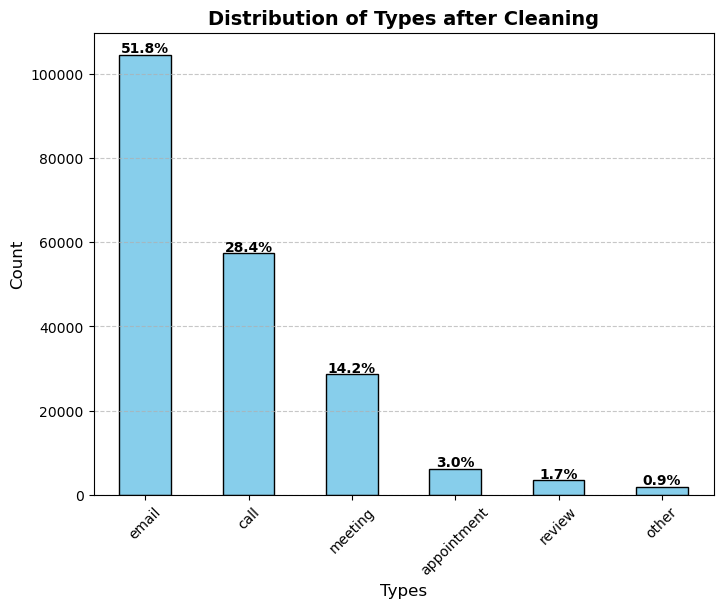

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
# حساب التوزيع
type_counts = df_clean["types"].value_counts()
type_percent = df_clean["types"].value_counts(normalize=True) * 100

plt.figure(figsize=(8,6))
ax = type_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Distribution of Types after Cleaning", fontsize=14, fontweight="bold")
plt.xlabel("Types", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# إضافة النسبة المئوية فوق كل عمود
for i, (count, pct) in enumerate(zip(type_counts, type_percent)):
    ax.text(i, count + 500, f"{pct:.1f}%", ha="center", fontsize=10, fontweight="bold")

plt.show()


5.	التنظيف المتقدم للعمود solution:

In [21]:
# 1) تحويل النصوص إلى صيغة موحدة (lowercase + strip)
df_clean["solution"] = df_clean["solution"].astype(str).str.strip().str.lower()

# 2) توحيد القيم إلى صيغة نهائية ثابتة
mapping = {
    "mrs": "MRS",
    "digital": "Digital",
    "pls": "PLS"
}

# نستخدم replace بدل map حتى لا تتحول القيم غير الموجودة في mapping إلى NaN
df_clean["solution"] = df_clean["solution"].replace(mapping)

# 3) استبدال القيم غير الصالحة أو الفارغة بـ NaN
invalid_values = ["nan", "none", "", "null"]
df_clean["solution"] = df_clean["solution"].replace(invalid_values, pd.NA)

# 4) تقرير بعد التنظيف
print("📊 توزيع القيم بعد التنظيف للعمود solution:")
print(df_clean["solution"].value_counts())
print("\n📊 النسب المئوية:")
print((df_clean["solution"].value_counts(normalize=True) * 100).round(2))

print("\nعدد الصفوف الأصلي:", len(df))
print("بعد جميع خطوات التنظيف:", len(df_clean))


📊 توزيع القيم بعد التنظيف للعمود solution:
solution
MRS        181814
Digital     18143
PLS          2031
Name: count, dtype: int64

📊 النسب المئوية:
solution
MRS        90.01
Digital     8.98
PLS         1.01
Name: proportion, dtype: float64

عدد الصفوف الأصلي: 259917
بعد جميع خطوات التنظيف: 201988


التمثيل البصري لتوزيع قيم solution قبل وبعد التنظيف

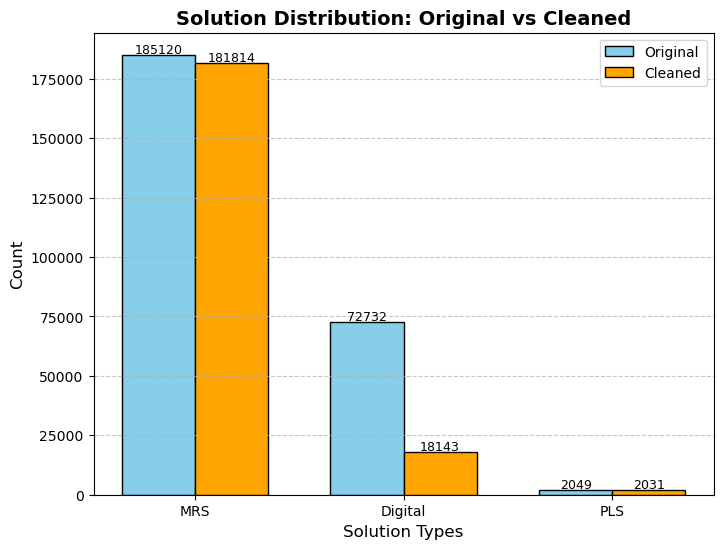

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# حساب التوزيع من البيانات الأصلية
original_counts = df["solution"].value_counts()

# حساب التوزيع من البيانات بعد التنظيف
cleaned_counts = df_clean["solution"].value_counts()

# الفئات المشتركة
categories = list(original_counts.index)
orig_values = [original_counts.get(cat, 0) for cat in categories]
clean_values = [cleaned_counts.get(cat, 0) for cat in categories]

# إعداد مواقع الأعمدة
x = np.arange(len(categories))
width = 0.35

# رسم الأعمدة
fig, ax = plt.subplots(figsize=(8,6))
bars1 = ax.bar(x - width/2, orig_values, width, label="Original", color="skyblue", edgecolor="black")
bars2 = ax.bar(x + width/2, clean_values, width, label="Cleaned", color="orange", edgecolor="black")

# إضافة العناوين والمحاور
ax.set_title("Solution Distribution: Original vs Cleaned", fontsize=14, fontweight="bold")
ax.set_xlabel("Solution Types", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# إضافة القيم فوق الأعمدة
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 500, f"{height}", ha="center", fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 500, f"{height}", ha="center", fontsize=9)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()




تنظيف العمود sourcesystem

In [23]:
import pandas as pd
import numpy as np

# حجم البيانات قبل التنظيف
initial_rows = len(df_clean)

# تحويل النصوص إلى صيغة موحدة (إزالة الفراغات + تحويل لحروف كبيرة)
df_clean["sourcesystem"] = df_clean["sourcesystem"].astype(str).str.strip().str.upper()

# تعريف القيم الصحيحة
valid_sources = ["SFDC_US", "SFDC_ROW", "SFDC_CXM", "SFDC_GLOBAL", "SFDC_BEANWORKS"]

# أي قيمة غير متوقعة تصبح Other
df_clean.loc[~df_clean["sourcesystem"].isin(valid_sources), "sourcesystem"] = "Other"

# حجم البيانات بعد التنظيف
final_rows = len(df_clean)
removed_rows = initial_rows - final_rows  # هنا غالبًا سيكون صفر لأننا لم نحذف الصفوف

# تحويل العمود إلى نوع category
df_clean["sourcesystem"] = df_clean["sourcesystem"].astype("category")

# تقرير صغير
print("تقرير التنظيف:")
print(f"- عدد الصفوف قبل التنظيف: {initial_rows}")
print(f"- عدد الصفوف بعد التنظيف: {final_rows}")
print(f"- عدد الصفوف المحذوفة: {removed_rows}")
print("\n📊 توزيع الفئات بعد التنظيف:")
print(df_clean["sourcesystem"].value_counts())

تقرير التنظيف:
- عدد الصفوف قبل التنظيف: 201988
- عدد الصفوف بعد التنظيف: 201988
- عدد الصفوف المحذوفة: 0

📊 توزيع الفئات بعد التنظيف:
sourcesystem
SFDC_US           126013
SFDC_ROW           53447
SFDC_GLOBAL        22504
SFDC_BEANWORKS        14
Other                 10
Name: count, dtype: int64


4-	تنظيف العمود opportunity_stage

In [24]:
import pandas as pd
import numpy as np

# حجم البيانات قبل التنظيف
initial_rows = len(df_clean)

# تحويل القيم إلى نصوص صغيرة وإزالة الفراغات
df_clean["opportunity_stage"] = df_clean["opportunity_stage"].astype(str).str.strip().str.lower()

# استبدال القيم غير الصالحة بـ NA
df_clean["opportunity_stage"] = df_clean["opportunity_stage"].replace(["nan", "none", "", "null"], pd.NA)

# حذف الصفوف التي بقيت قيمها مفقودة
df_clean = df_clean.dropna(subset=["opportunity_stage"])

# حساب التوزيع النسبي للفئات
value_counts = df_clean["opportunity_stage"].value_counts(normalize=True)

# تحديد الفئات النادرة (أقل من 1%)
rare_stages = value_counts[value_counts < 0.01].index

# دمج الفئات النادرة في فئة "other"
df_clean["opportunity_stage"] = df_clean["opportunity_stage"].replace(rare_stages, "other")

# تحويل العمود إلى نوع category
df_clean["opportunity_stage"] = df_clean["opportunity_stage"].astype("category")

# حجم البيانات بعد التنظيف
final_rows = len(df_clean)
removed_rows = initial_rows - final_rows

# تقرير شامل
print("تقرير التنظيف:")
print(f"- عدد الصفوف قبل التنظيف: {initial_rows}")
print(f"- عدد الصفوف بعد التنظيف: {final_rows}")
print(f"- عدد الصفوف المحذوفة: {removed_rows}")

print("\n📊 توزيع الفئات بعد التنظيف:")
print(df_clean["opportunity_stage"].value_counts())

print("\n📊 النسب المئوية لكل فئة بعد التنظيف:")
print((df_clean["opportunity_stage"].value_counts(normalize=True) * 100).round(2))

print("\n📋 قائمة الفئات الفريدة في العمود opportunity_stage:")
print(sorted(df_clean["opportunity_stage"].unique()))


تقرير التنظيف:
- عدد الصفوف قبل التنظيف: 201988
- عدد الصفوف بعد التنظيف: 201988
- عدد الصفوف المحذوفة: 0

📊 توزيع الفئات بعد التنظيف:
opportunity_stage
no_opp     158851
won         18216
lost        14235
other        5813
ongoing      4873
Name: count, dtype: int64

📊 النسب المئوية لكل فئة بعد التنظيف:
opportunity_stage
no_opp     78.64
won         9.02
lost        7.05
other       2.88
ongoing     2.41
Name: proportion, dtype: float64

📋 قائمة الفئات الفريدة في العمود opportunity_stage:
['lost', 'no_opp', 'ongoing', 'other', 'won']


5-	تنظيف العمود is_lead :

In [25]:
# تنظيف العمود is_lead على df_clean فقط

# تحويل القيم إلى أعداد رقمية مباشرة
df_clean["is_lead"] = pd.to_numeric(df_clean["is_lead"], errors="coerce")

# حذف القيم المفقودة (إن وجدت)
df_clean = df_clean.dropna(subset=["is_lead"])

print(" القيم الفريدة بعد التنظيف:")
print(df_clean["is_lead"].unique())


 القيم الفريدة بعد التنظيف:
[1. 2.]


إظهار تقرير البيانات بعد التنظيف المتقدم :

In [26]:
import pandas as pd
import datetime
from pandas_profiling import ProfileReport

# ===== إنشاء التقرير وعرضه =====
try:
    # ملخص سريع قبل التقرير
    print("📊 ملخص سريع:")
    print(f"- عدد الصفوف: {len(df_clean)}")
    print(f"- عدد الأعمدة: {df_clean.shape[1]}")

    # وقت التنفيذ
    current_time = datetime.datetime.now()
    print("🕒 وقت إنشاء التقرير:", current_time)

    # إنشاء التقرير
    profile = ProfileReport(
        df_clean,
        title="تقرير البيانات بعد التنظيف مرحلة أولى",
        explorative=True  # يفعّل التحليل الاستكشافي الموسّع
    )

    # عرض داخل الـ Notebook
    profile.to_notebook_iframe()

    # حفظ نسخة HTML باسم ديناميكي يحتوي على التاريخ والوقت
    report_path = f"profile_df_clean_{current_time.strftime('%Y%m%d_%H%M%S')}.html"
    profile.to_file(report_path)
    print(f"💾 تم حفظ التقرير كملف HTML في: {report_path}")

except Exception as e:
    raise RuntimeError(f"❌ حدث خطأ أثناء إنشاء/عرض التقرير: {e}")


📊 ملخص سريع:
- عدد الصفوف: 201988
- عدد الأعمدة: 11
🕒 وقت إنشاء التقرير: 2026-01-17 22:43:46.379068


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                                                                                           | 0/11 [00:00<?, ?it/s]
%|███████▌                                                                           | 1/11 [00:01<00:18,  1.85s/it]
100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:01<00:00,  5.51it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

💾 تم حفظ التقرير كملف HTML في: profile_df_clean_20260117_224346.html


معالجة أولية بعد التقرير

In [27]:
import pandas as pd

#  1) إزالة التكرارات
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates().copy()
final_rows = len(df_clean)
removed_duplicates = initial_rows - final_rows

print("📋 تقرير إزالة التكرارات:")
print(f"- عدد الصفوف قبل الإزالة: {initial_rows}")
print(f"- عدد الصفوف بعد الإزالة: {final_rows}")
print(f"- عدد الصفوف المكررة المحذوفة: {removed_duplicates}")

#  2) إعادة ترميز is_lead
df_clean["is_lead"] = df_clean["is_lead"].replace({1.0: 1, 2.0: 0}).astype(int)
print("\n📋 القيم الفريدة في العمود is_lead بعد الترميز:")
print(df_clean["is_lead"].unique())

#  3) حذف الأعمدة غير الضرورية
cols_to_drop = ["is_valid_date", "activity_date_parsed"]
df_clean = df_clean.drop(columns=cols_to_drop, errors="ignore")
print("\n الأعمدة المحذوفة:", cols_to_drop)
print(" عدد الأعمدة بعد الحذف:", df_clean.shape[1])

#  4) طباعة التوزيع (عدد + نسبة مئوية)
categorical_cols = ["sourcesystem", "opportunity_stage", "types", "country", "solution"]

print("\n📊 جداول التوزيع (عدد + نسبة مئوية) لكل عمود فئوي:\n")

for col in categorical_cols:
    counts = df_clean[col].value_counts()
    percentages = df_clean[col].value_counts(normalize=True) * 100

    summary_table = pd.DataFrame({
        "Count": counts,
        "Percentage (%)": percentages.round(2)
    })
    print(f"\n--- {col} ---")
    print(summary_table)

#  5) جدول عدد القيم الفريدة
unique_counts = {col: df_clean[col].nunique() for col in categorical_cols}
unique_table = pd.DataFrame(list(unique_counts.items()), columns=["Column", "Unique Values"])

print("\n📋 عدد القيم الفريدة في الأعمدة الفئوية:")
print(unique_table)

📋 تقرير إزالة التكرارات:
- عدد الصفوف قبل الإزالة: 201988
- عدد الصفوف بعد الإزالة: 201284
- عدد الصفوف المكررة المحذوفة: 704

📋 القيم الفريدة في العمود is_lead بعد الترميز:
[1 0]

 الأعمدة المحذوفة: ['is_valid_date', 'activity_date_parsed']
 عدد الأعمدة بعد الحذف: 11

📊 جداول التوزيع (عدد + نسبة مئوية) لكل عمود فئوي:


--- sourcesystem ---
                 Count  Percentage (%)
sourcesystem                          
SFDC_US         125357           62.28
SFDC_ROW         53432           26.55
SFDC_GLOBAL      22471           11.16
SFDC_BEANWORKS      14            0.01
Other               10            0.00

--- opportunity_stage ---
                    Count  Percentage (%)
opportunity_stage                        
no_opp             158766           78.88
won                 18082            8.98
lost                13785            6.85
other                5790            2.88
ongoing              4861            2.41

--- types ---
              Count  Percentage (%)
types       

 استخراج الفئات النادرة (<1%)
قبل تطبيق SMOTENC.

In [28]:
import pandas as pd

categorical_cols = ["sourcesystem", "opportunity_stage", "types", "country", "solution"]

rare_rows = []

for col in categorical_cols:
    freq = df_clean[col].value_counts(normalize=True) * 100
    rare = freq[freq < 1]

    if len(rare) > 0:
        for category, pct in rare.items():
            rare_rows.append({
                "Column": col,
                "Category": category,
                "Percentage": round(pct, 4)
            })

# تحويل القائمة إلى جدول
rare_table = pd.DataFrame(rare_rows)

print("📋 الفئات النادرة جدًا (<1%) في الأعمدة الفئوية:")
print(rare_table if not rare_table.empty else "لا توجد فئات نادرة أقل من 1%")

📋 الفئات النادرة جدًا (<1%) في الأعمدة الفئوية:
          Column           Category  Percentage
0   sourcesystem     SFDC_BEANWORKS      0.0070
1   sourcesystem              Other      0.0050
2          types              other      0.9285
3        country                 CA      0.5072
4        country                 BE      0.2921
5        country                 CH      0.2782
6        country                 IT      0.2047
7        country                 IE      0.1754
8        country                 AT      0.1471
9        country                 NL      0.1441
10       country         Guadeloupe      0.0835
11       country           Rأ©union      0.0412
12       country                 LU      0.0353
13       country            Denmark      0.0273
14       country         Martinique      0.0199
15       country  Guyane Franأ§aise      0.0129
16       country                 DK      0.0005


  تجميع الفئات النادرة في "Other

In [29]:
threshold = 1.0  # أقل من 1%

for col in categorical_cols:

    # التأكد من أن العمود Categorical
    df_clean[col] = df_clean[col].astype("category")

    # إضافة Other إذا لم تكن موجودة
    if "Other" not in df_clean[col].cat.categories:
        df_clean[col] = df_clean[col].cat.add_categories(["Other"])

    # حساب التوزيع
    freq = df_clean[col].value_counts(normalize=True) * 100

    # استبعاد فئة Other من الفئات النادرة
    rare_categories = freq[(freq < threshold) & (freq.index != "Other")].index

    # عدد السجلات التي سيتم دمجها
    rare_count = df_clean[col].isin(rare_categories).sum()
    rare_pct = round((rare_count / len(df_clean)) * 100, 4)

    # دمج الفئات النادرة
    df_clean.loc[df_clean[col].isin(rare_categories), col] = "Other"

    # إعادة تحويل العمود إلى category بعد الدمج
    df_clean[col] = df_clean[col].astype("category")

    print(f"📋 العمود {col}: تم دمج {rare_count} سجل ({rare_pct}%) ضمن 'Other'")

print("\n✅ تم دمج جميع الفئات النادرة (<1%) في 'Other' مع الحفاظ على الأعمدة كـ Categorical")

📋 العمود sourcesystem: تم دمج 14 سجل (0.007%) ضمن 'Other'
📋 العمود opportunity_stage: تم دمج 0 سجل (0.0%) ضمن 'Other'
📋 العمود types: تم دمج 1869 سجل (0.9285%) ضمن 'Other'
📋 العمود country: تم دمج 3964 سجل (1.9694%) ضمن 'Other'
📋 العمود solution: تم دمج 0 سجل (0.0%) ضمن 'Other'

✅ تم دمج جميع الفئات النادرة (<1%) في 'Other' مع الحفاظ على الأعمدة كـ Categorical


كود لتحويل عمود التاريخ إلى أعمدة مشتقة

In [30]:
import pandas as pd

# ===== تحويل العمود activity_date إلى ميزات مشتقة =====

# التأكد من أن العمود موجود
if "activity_date" in df_clean.columns:
    # تحويل العمود إلى نوع datetime إذا لم يكن كذلك
    df_clean["activity_date"] = pd.to_datetime(df_clean["activity_date"], errors="coerce")
    
    # استخراج الميزات المشتقة
    df_clean["activity_year"] = df_clean["activity_date"].dt.year
    df_clean["activity_month"] = df_clean["activity_date"].dt.month
    df_clean["activity_day"] = df_clean["activity_date"].dt.day
    
    print("✅ تم استخراج الميزات المشتقة من activity_date: year, month, day")
    print("📋 الأعمدة الجديدة:", ["activity_year", "activity_month", "activity_day"])
else:
    print("⚠️ العمود activity_date غير موجود في df_clean")

✅ تم استخراج الميزات المشتقة من activity_date: year, month, day
📋 الأعمدة الجديدة: ['activity_year', 'activity_month', 'activity_day']


تطبيق خوارزمية SMOTENC لإعادة توازن البيانات


In [31]:
import pandas as pd
from imblearn.over_sampling import SMOTENC

# ===== نسخة احتياطية =====
df_backup = df_clean.copy()
print("📋 تم إنشاء نسخة احتياطية من df_clean باسم df_backup")

# ===== إعداد البيانات لـ SMOTENC =====

# العمود الهدف
y = df_clean["solution"]

# استبعاد الأعمدة غير الضرورية والهدف
exclude_cols = ["solution", "account_id", "who_id", "country_clean", "country_standard", "activity_date"]
X = df_clean.drop(columns=exclude_cols, errors="ignore")

# الأعمدة الفئوية الداخلة في SMOTENC
categorical_cols = ["sourcesystem", "opportunity_stage", "types", "country"]

# تحديد مواقع الأعمدة الفئوية
categorical_features = [X.columns.get_loc(col) for col in categorical_cols]

print("\n📋 الأعمدة الفئوية الداخلة في SMOTENC:", categorical_cols)
print("📋 الأعمدة العددية الداخلة في SMOTENC:", [c for c in X.columns if c not in categorical_cols])

# ===== توزيع الفئات قبل إعادة التوازن =====
print("\n📊 توزيع solution قبل إعادة التوازن:")
print(y.value_counts())
print((y.value_counts(normalize=True) * 100).round(2))

# ===== تطبيق SMOTENC =====
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

# تحويل النتائج إلى DataFrame
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name="solution")

# ===== توزيع الفئات بعد إعادة التوازن =====
print("\n📊 توزيع solution بعد إعادة التوازن:")
print(y_resampled.value_counts())
print((y_resampled.value_counts(normalize=True) * 100).round(2))

# ===== حجم البيانات قبل وبعد =====
print("\n📋 حجم البيانات:")
print(f"- قبل إعادة التوازن: {len(X)} سجل")
print(f"- بعد إعادة التوازن: {len(X_resampled)} سجل")

# ===== استعادة النسخة الاحتياطية عند الحاجة =====
# df_clean = df_backup.copy()
# print("✅ تم استرجاع النسخة الأصلية من df_backup")

📋 تم إنشاء نسخة احتياطية من df_clean باسم df_backup

📋 الأعمدة الفئوية الداخلة في SMOTENC: ['sourcesystem', 'opportunity_stage', 'types', 'country']
📋 الأعمدة العددية الداخلة في SMOTENC: ['is_lead', 'activity_year', 'activity_month', 'activity_day']

📊 توزيع solution قبل إعادة التوازن:
solution
MRS        181205
Digital     18055
PLS          2024
Other           0
Name: count, dtype: int64
solution
MRS        90.02
Digital     8.97
PLS         1.01
Other       0.00
Name: proportion, dtype: float64

📊 توزيع solution بعد إعادة التوازن:
solution
Digital    181205
MRS        181205
PLS        181205
Other           0
Name: count, dtype: int64
solution
Digital    33.33
MRS        33.33
PLS        33.33
Other       0.00
Name: proportion, dtype: float64

📋 حجم البيانات:
- قبل إعادة التوازن: 201284 سجل
- بعد إعادة التوازن: 543615 سجل


كودًا قصيرًا يقوم بفحص سريع لـ القيم المفقودة والقيم الشاذة في الأعمدة العددية والفئوية، ليكون بمثابة "تقرير نهائي للتنظيف"؟ 


In [32]:
import pandas as pd

# ===== تقرير نهائي للتنظيف =====

# 1️⃣ فحص القيم المفقودة
print("📋 تقرير القيم المفقودة (NaN):")
missing_report = df_clean.isnull().sum()
missing_report = missing_report[missing_report > 0].sort_values(ascending=False)
if not missing_report.empty:
    print(missing_report)
else:
    print("✅ لا توجد قيم مفقودة في البيانات")

# 2️⃣ فحص القيم الشاذة في الأعمدة العددية باستخدام IQR
print("\n📋 تقرير القيم الشاذة (Outliers) في الأعمدة العددية:")
numeric_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns
outlier_report = {}

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
    outlier_report[col] = outliers

outlier_report = pd.Series(outlier_report)
print(outlier_report[outlier_report > 0].sort_values(ascending=False))

# 3️⃣ فحص القيم النادرة جدًا في الأعمدة الفئوية (<1%)
print("\n📋 تقرير الفئات النادرة (<1%) في الأعمدة الفئوية:")
categorical_cols = df_clean.select_dtypes(include=["category", "object"]).columns
rare_report = {}

for col in categorical_cols:
    freq = df_clean[col].value_counts(normalize=True) * 100
    rare = freq[freq < 1]
    if not rare.empty:
        rare_report[col] = rare

if rare_report:
    for col, rare in rare_report.items():
        print(f"\n--- {col} ---")
        print(rare)
else:
    print("✅ لا توجد فئات نادرة جدًا (<1%) في الأعمدة الفئوية")

📋 تقرير القيم المفقودة (NaN):
✅ لا توجد قيم مفقودة في البيانات

📋 تقرير القيم الشاذة (Outliers) في الأعمدة العددية:
Series([], dtype: int64)

📋 تقرير الفئات النادرة (<1%) في الأعمدة الفئوية:

--- account_id ---
account_id
0010L00001j3JeEQAU    0.637905
001b000003HA0UxAAL    0.322927
001b000003Ha49gAAB    0.258341
001b000003HA8AiAAL    0.230520
001E000000clx0LIAQ    0.205680
                        ...   
0016g00000P3oj8AAB    0.000497
0010L00001j11YgQAI    0.000497
0016g00000P3ofSAAR    0.000497
0016g00000P3ofQAAR    0.000497
001b0000040SrI2AAK    0.000497
Name: proportion, Length: 12881, dtype: float64

--- sourcesystem ---
sourcesystem
Other             0.011923
SFDC_BEANWORKS    0.000000
Name: proportion, dtype: float64

--- who_id ---
who_id
0030y00002JqdZyAAJ    0.226049
0030L00001uiZKkQAM    0.140101
0030y00002HeyhqAAB    0.062598
0036g00000QeH8zAAF    0.057630
003Vw00000B51ziIAB    0.057630
                        ...   
0034X00002xXXKBQA4    0.000497
003Vw00000EkW01IAF    0.000

البند الثاني
2- Group the accounts by country and solution, then find the top five paths for each.

 حفظ نسخة احتياطية من df_clean

In [33]:
# حفظ نسخة احتياطية من df_clean
df_backup = df_clean.copy()


1.	بناء مسارات رحلة العميل (Customer Journey Paths):
🔵 الخلية 1 — بناء المسارات لكل حساب

In [34]:
df_sorted = df_clean.sort_values(by=["account_id", "activity_date"])

paths = (
    df_sorted
    .groupby("account_id")["types"]
    .apply(lambda x: " → ".join(x.astype(str)))
    .reset_index(name="path")
)

🔵 الخلية 2 — دمج المسارات مع الدولة والحل


In [35]:
df_paths = df_clean[["account_id", "country_standard", "solution"]].drop_duplicates()

df_paths = df_paths.merge(paths, on="account_id", how="left")

🔵 الخلية 3 — إنشاء df_valid_paths (الخلية المفقودة عندك)

In [36]:
df_valid_paths = df_paths[df_paths["path"].notna()].copy()

🔵 الخلية 4 — حساب تكرار كل path


In [37]:
path_counts = (
    df_valid_paths
    .groupby(["country_standard", "solution", "path"], observed=False)
    .size()
    .reset_index(name="count")
)

🔵 الخلية 5 — استخراج Top 5 لكل دولة ولكل حل


In [38]:
top5_paths = (
    path_counts
    .sort_values(["country_standard", "solution", "count"], ascending=[True, True, False])
    .groupby(["country_standard", "solution"], observed=False)
    .head(5)
    .reset_index(drop=True)
)

top5_paths

country_standard solution  \
0            Austria  Digital   
1            Austria  Digital   
2            Austria  Digital   
3            Austria  Digital   
4            Austria  Digital   
..               ...      ...   
335    United States    Other   
336    United States    Other   
337    United States    Other   
338    United States    Other   
339    United States    Other   

                                                  path  count  
0                                                Other      0  
1                                        Other → Other      0  
2    Other → Other → Other → Other → Other → Other ...      0  
3    Other → Other → Other → Other → meeting → emai...      0  
4    Other → Other → Other → Other → meeting → meet...      0  
..                                                 ...    ...  
335                                              Other      0  
336                                      Other → Other      0  
337  Other → Other → Other → Other → Other → Other ...      0  
338  Other → Other → Other → Other → meeting → emai...      0  
339  Other → Other → Other → Other → meeting → meet...      0  

[340 rows x 4 columns]

 البند الثالث
بناء شجرة القرار

البند الثالث- المرحلة 1 — بناء DataFrame لتوقع الـ Next Action

In [39]:
# 1) إنشاء نسخة للعمل عليها
df_next = df_sorted.copy()

# 2) إنشاء عمود next_action باستخدام shift داخل كل حساب
df_next["next_action"] = df_next.groupby("account_id")["types"].shift(-1)

# 3) حذف الصفوف التي ليس لها next_action (آخر نشاط في الرحلة)
df_next = df_next.dropna(subset=["next_action"])

# 4) الاحتفاظ بالأعمدة المهمة فقط
df_next = df_next[[
    "account_id",
    "country_standard",
    "solution",
    "types",          # current action
    "next_action"     # target
]]

print("عدد الصفوف:", len(df_next))
print("عدد الأنشطة الفريدة:", df_next['types'].nunique())
print("عدد الأنشطة الهدف (next_action):", df_next['next_action'].nunique())

df_next.head(10)

عدد الصفوف: 188403
عدد الأنشطة الفريدة: 6
عدد الأنشطة الهدف (next_action): 6


account_id country_standard solution  types next_action
0  0010L00001hVmFhQAK    United States      MRS  email        call
1  0010L00001hVmFhQAK    United States      MRS   call        call
2  0010L00001hVmFhQAK    United States      MRS   call        call
3  0010L00001hVmFhQAK    United States      MRS   call        call
4  0010L00001hVmFhQAK    United States      MRS   call        call
5  0010L00001hVmFhQAK    United States      MRS   call        call
6  0010L00001hVmFhQAK    United States      MRS   call        call
7  0010L00001hVmFhQAK    United States      MRS   call        call
8  0010L00001hVmFhQAK    United States      MRS   call        call
9  0010L00001hVmFhQAK    United States      MRS   call        call

1) خلية تجهيز df_next
✔ نفذتها

In [40]:
top4_by_country_solution = (
    df_next.groupby(["country_standard", "solution"], observed=False)["next_action"]
    .value_counts(normalize=True)
    .groupby(level=[0,1], observed=False)
    .nlargest(4)
    .unstack(fill_value=0)
)

2) خلية حساب top‑4


In [41]:
top4_by_country_solution

next_action                                          appointment      call  \
country_standard solution country_standard solution                          
Austria          Digital  Austria          Digital      0.000000  0.000000   
                 MRS      Austria          MRS          0.009132  0.000000   
                 PLS      Austria          PLS          0.000000  0.000000   
                 Other    Austria          Other        0.000000  0.000000   
Belgium          Digital  Belgium          Digital      0.000000  0.000000   
...                                                          ...       ...   
UK               Other    UK               Other        0.000000  0.000000   
United States    Digital  United States    Digital      0.000000  0.255438   
                 MRS      United States    MRS          0.000000  0.275848   
                 PLS      United States    PLS          0.000000  0.228552   
                 Other    United States    Other        0.000000  0.000000   

next_action                                             email   meeting  \
country_standard solution country_standard solution                       
Austria          Digital  Austria          Digital   0.000000  0.000000   
                 MRS      Austria          MRS       0.986301  0.000000   
                 PLS      Austria          PLS       0.000000  0.000000   
                 Other    Austria          Other     0.000000  0.000000   
Belgium          Digital  Belgium          Digital   1.000000  0.000000   
...                                                       ...       ...   
UK               Other    UK               Other     0.000000  0.000000   
United States    Digital  United States    Digital   0.564546  0.147083   
                 MRS      United States    MRS       0.547733  0.149516   
                 PLS      United States    PLS       0.587131  0.157507   
                 Other    United States    Other     0.000000  0.000000   

next_action                                             Other    review  
country_standard solution country_standard solution                      
Austria          Digital  Austria          Digital   0.000000  0.000000  
                 MRS      Austria          MRS       0.004566  0.000000  
                 PLS      Austria          PLS       0.000000  0.000000  
                 Other    Austria          Other     0.000000  0.000000  
Belgium          Digital  Belgium          Digital   0.000000  0.000000  
...                                                       ...       ...  
UK               Other    UK               Other     0.000000  0.000000  
United States    Digital  United States    Digital   0.000000  0.023887  
                 MRS      United States    MRS       0.000000  0.019268  
                 PLS      United States    PLS       0.000000  0.022118  
                 Other    United States    Other     0.000000  0.000000  

[68 rows x 6 columns]

3) خلية تحويل top‑4 إلى dict


In [42]:
top4_dict = top4_by_country_solution.to_dict()

🟦 المرحلة 2 — ترميز البيانات Encoding
:

In [43]:
from sklearn.preprocessing import LabelEncoder

# إنشاء نسخة للعمل عليها
df_model = df_next.copy()

# الأعمدة التي تحتاج ترميز
cols_to_encode = ["country_standard", "solution", "types", "next_action"]

encoders = {}

for col in cols_to_encode:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    encoders[col] = le
types_encoder = encoders["types"]
next_encoder = encoders["next_action"]
# تجهيز X و y
X = df_model[["country_standard", "solution", "types"]]
y = df_model["next_action"]

df_model.head()

account_id  country_standard  solution  types  next_action
0  0010L00001hVmFhQAK                16         1      3            2
1  0010L00001hVmFhQAK                16         1      2            2
2  0010L00001hVmFhQAK                16         1      2            2
3  0010L00001hVmFhQAK                16         1      2            2
4  0010L00001hVmFhQAK                16         1      2            2

تقسيم البيانات إلى مجموعتي تدريب واختبار

In [44]:
from sklearn.model_selection import train_test_split

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% للاختبار
    random_state=42,    # لضمان نفس النتائج في كل تشغيل
    stratify=y          # لضمان توازن الفئات في التدريب والاختبار
)

print("عدد سجلات التدريب:", len(X_train))
print("عدد سجلات الاختبار:", len(X_test))
print("\nتوزيع الفئات في y_train:")
print(y_train.value_counts(normalize=True).round(3))

print("\nتوزيع الفئات في y_test:")
print(y_test.value_counts(normalize=True).round(3))

عدد سجلات التدريب: 150722
عدد سجلات الاختبار: 37681

توزيع الفئات في y_train:
next_action
3    0.524
2    0.293
4    0.130
1    0.028
5    0.016
0    0.009
Name: proportion, dtype: float64

توزيع الفئات في y_test:
next_action
3    0.524
2    0.293
4    0.130
1    0.028
5    0.016
0    0.009
Name: proportion, dtype: float64


 4.	إنشاء نموذج Decision Tree:


In [45]:
from sklearn.tree import DecisionTreeClassifier

# إنشاء النموذج
dt_model = DecisionTreeClassifier(
    max_depth=6,        # عمق مناسب يمنع overfitting
    random_state=42     # لضمان ثبات النتائج
)

5.	تدريب نموذج Decision Tree :

In [46]:
# تدريب نموذج Decision Tree باستخدام بيانات التدريب فقط
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

تقييم أداء نموذج Decision Tree

In [47]:
from sklearn.metrics import accuracy_score

# التنبؤ على بيانات التدريب والاختبار
train_pred = dt_model.predict(X_train)
test_pred = dt_model.predict(X_test)

# حساب الدقة
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("دقة التدريب:", round(train_acc, 4))
print("دقة الاختبار:", round(test_acc, 4))

دقة التدريب: 0.6867
دقة الاختبار: 0.6856


  استخراج أهمية الخصائصFeature Importance

In [48]:
import pandas as pd

# استخراج أهمية الميزات من النموذج
importances = dt_model.feature_importances_

# أسماء الميزات
feature_names = ["country_standard", "solution", "types"]

# إنشاء DataFrame للعرض
fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

fi_df

feature  importance
2             types    0.927810
0  country_standard    0.056922
1          solution    0.015268

In [49]:
import numpy as np
import pandas as pd

# الحصول على احتمالات التنبؤ لكل فئة
probs = dt_model.predict_proba(X_test)

# أسماء الفئات بعد الترميز
class_labels = encoders["next_action"].classes_

# استخراج أفضل 4 احتمالات لكل صف
top4_indices = np.argsort(probs, axis=1)[:, -4:][:, ::-1]

# تحويلها إلى أسماء الأنشطة
top4_actions = np.array(class_labels)[top4_indices]

# وضع النتائج في DataFrame
top4_df = pd.DataFrame(top4_actions, columns=[
    "Top1", "Top2", "Top3", "Top4"
])

# عرض أول 10 صفوف
top4_df.head(10)

Top1         Top2     Top3    Top4
0     call        email  meeting   Other
1     call        email  meeting   Other
2    email         call  meeting  review
3    email         call  meeting  review
4    email         call  meeting   Other
5     call        email  meeting   Other
6    email         call  meeting  review
7  meeting  appointment    email    call
8    email         call  meeting   Other
9    email         call  meeting  review

البند الرابع: بناء النظام الكامل

 الجزء 1 — Top 4 Actions حسب الدولة Country


In [50]:
def top4_by_country(df_next, country):
    subset = df_next[df_next["country_standard"] == country]
    counts = subset["next_action"].value_counts().head(4)
    
    print(f"Top 4 actions for country: {country}")
    return counts.index.tolist()

# مثال:
top4_by_country(df_next, "Saudi Arabia")

Top 4 actions for country: Saudi Arabia


['appointment', 'call', 'email', 'meeting']

🟦 الكود: Top 4 Actions حسب Solution


In [51]:
def top4_by_solution(df_next, solution):
    subset = df_next[df_next["solution"] == solution]
    counts = subset["next_action"].value_counts().head(4)
    
    print(f"Top 4 actions for solution: {solution}")
    return counts.index.tolist()

# مثال:
top4_by_solution(df_next, "Digital")

Top 4 actions for solution: Digital


['email', 'call', 'meeting', 'review']

🟦 Top 4 Actions حسب Country + Solution


In [52]:
def top4_by_country_solution(df_next, country, solution):
    subset = df_next[
        (df_next["country_standard"] == country) &
        (df_next["solution"] == solution)
    ]
    counts = subset["next_action"].value_counts().head(4)
    
    print(f"Top 4 actions for {country} + {solution}")
    return counts.index.tolist()

# مثال:
top4_by_country_solution(df_next, "Saudi Arabia", "Digital")

Top 4 actions for Saudi Arabia + Digital


['appointment', 'call', 'email', 'meeting']

🟦 المرحلة 3 — خوارزمية تعديل الأوزان الديناميكية


In [53]:
import numpy as np

def recalc_top4_with_new_action(country, solution, types, new_action, weight=1.5):
    # التحقق من أن القيم موجودة داخل الـ encoders
    if country not in encoders["country_standard"].classes_:
        return [f"Country '{country}' not found in training data"]
    
    if solution not in encoders["solution"].classes_:
        return [f"Solution '{solution}' not found in training data"]
    
    if types not in encoders["types"].classes_:
        return [f"Type '{types}' not found in training data"]

    # ترميز المدخلات
    country_enc = encoders["country_standard"].transform([country])[0]
    solution_enc = encoders["solution"].transform([solution])[0]
    types_enc = encoders["types"].transform([types])[0]

    # تجهيز المدخلات للنموذج
    X_input = np.array([[country_enc, solution_enc, types_enc]])

    # الحصول على الاحتمالات الأصلية
    probs = dt_model.predict_proba(X_input)[0].copy()

    # زيادة وزن النشاط الجديد
    if new_action in encoders["next_action"].classes_:
        idx = list(encoders["next_action"].classes_).index(new_action)
        probs[idx] *= weight

    # استخراج أفضل 4 احتمالات بعد التعديل
    top4_idx = np.argsort(probs)[-4:][::-1]
    class_labels = encoders["next_action"].classes_
    new_top4 = class_labels[top4_idx]

    return new_top4.tolist()

مثال عملي:

In [54]:
recalc_top4_with_new_action(
    "United States",
    "Digital",
    "email",
    new_action="call"
)

C:\Users\acc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


['email', 'call', 'meeting', 'review']

حفظ النموذج

In [55]:
import joblib

joblib.dump(dt_model, "dt_model.pkl")
joblib.dump(encoders, "encoders.pkl")

print("Model and encoders saved successfully.")

Model and encoders saved successfully.


انتهى البند الرابع

انتهى المشروع بعون الله تعالى